# Detect Reject emails

Author: Sethpoly@kaggle

Link: https://www.kaggle.com/code/sethpoly/detect-reject-emails

## Section A - University Guided Analysis

In [188]:
import numpy as np 
import pandas as pd
from gensim.models import Word2Vec
import nltk
df = pd.read_csv('Rejection Data - Sheet1.csv')
df.tail()

,Email,Status
124,"Starting March 17, 2021, eBay will no longer ...",not_reject
125,"Hi Seth,\n\nI want to make finding a great rem...",not_reject
126,"Hello Seth,\n\nI just wanted to take a second ...",not_reject
127,Your free YouMail plan includes 20 in-app tran...,not_reject
128,\nSupport resources for developers at all leve...,not_reject


In [189]:
#nltk.download() 
# uncomment to download all packages when dialogue box appears, only needs to be done once

In [190]:
import string
import matplotlib.pyplot as plt
import nltk

df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('\n',' '))) # replace new line with spaces
df.tail()



,Email,Status
124,"Starting March 17, 2021, eBay will no longer ...",not_reject
125,"Hi Seth, I want to make finding a great remot...",not_reject
126,"Hello Seth, I just wanted to take a second to...",not_reject
127,Your free YouMail plan includes 20 in-app tran...,not_reject
128,Support resources for developers at all level...,not_reject


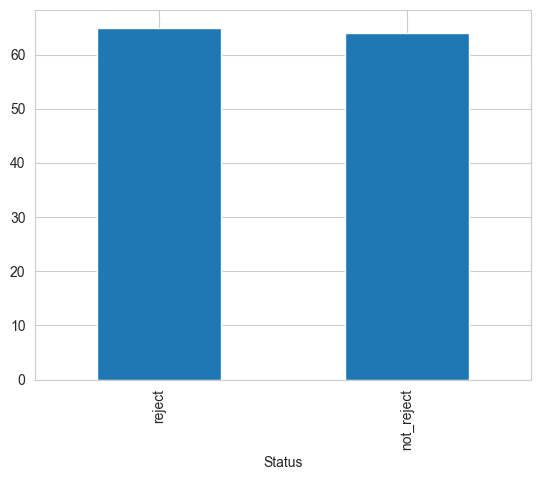

In [191]:
df.Status.value_counts().plot(kind='bar')
plt.show()

In [192]:
# Counts for each Status value
status_counts = df['Status'].value_counts()

# Count of all Status values
total_counts = status_counts.sum()

print("Total counts for each status:")
print(status_counts)
print("\nTotal count of all statuses:", total_counts)

Total counts for each status:
Status
reject        65
not_reject    64
Name: count, dtype: int64

Total count of all statuses: 129


In [193]:
# Add a column 'Tokens' to df, to hold the email contents as a list of tokens
df['Tokens'] = [nltk.word_tokenize(e) for e in df.Email]

print(df.Tokens[0])

['Thank', 'you', 'for', 'applying', 'to', 'the', 'Junior', 'Software', 'Developer', 'position', 'at', 'MSC', 'Technology', '.', 'Unfortunately', ',', 'MSC', 'Technology', 'has', 'moved', 'to', 'the', 'next', 'step', 'in', 'their', 'hiring', 'process', ',', 'and', 'your', 'application', 'was', 'not', 'selected', 'at', 'this', 'time', '.']


In [194]:
# New column that contains the number of tokens in each row
df['Length'] = df['Tokens'].apply(len)
df.head()

,Email,Status,Tokens,Length
0,Thank you for applying to the Junior Software ...,reject,"[Thank, you, for, applying, to, the, Junior, S...",39
1,Thank you for your interest in the Train To Hi...,reject,"[Thank, you, for, your, interest, in, the, Tra...",47
2,"eth, Thank you for your interest in Exyn and...",reject,"[eth, ,, Thank, you, for, your, interest, in, ...",139
3,Thank you for your interest in the Software En...,reject,"[Thank, you, for, your, interest, in, the, Sof...",49
4,"Hi Seth, Thank you for your interest in PathA...",reject,"[Hi, Seth, ,, Thank, you, for, your, interest,...",81


C:\Users\ellyp\AppData\Local\Temp\ipykernel_20040\454518017.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([reject, not_reject], vert=False, labels=['Reject Emails', 'Not Reject Emails'],


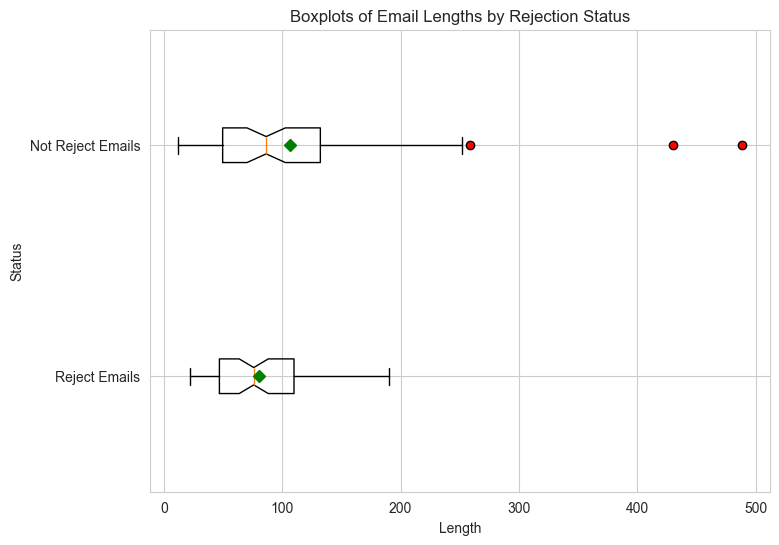

In [195]:
# Boxplot visualisation comparing token lengths by rejection status

status_grouped = df.groupby('Status')['Length']

reject = status_grouped.get_group('reject')
not_reject = status_grouped.get_group('not_reject')

red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.figure(figsize=(8, 6))
plt.boxplot([reject, not_reject], vert=False, labels=['Reject Emails', 'Not Reject Emails'],
            flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

plt.xlabel('Length')
plt.ylabel('Status')
plt.title('Boxplots of Email Lengths by Rejection Status')
plt.show()

In [196]:
# Column to define the texical richness for each row, number of unique tokens in a text

df['LexRich'] = df['Tokens'].apply(lambda x: len(set(x)) / len(x))
df.head()

,Email,Status,Tokens,Length,LexRich
0,Thank you for applying to the Junior Software ...,reject,"[Thank, you, for, applying, to, the, Junior, S...",39,0.820513
1,Thank you for your interest in the Train To Hi...,reject,"[Thank, you, for, your, interest, in, the, Tra...",47,0.765957
2,"eth, Thank you for your interest in Exyn and...",reject,"[eth, ,, Thank, you, for, your, interest, in, ...",139,0.669065
3,Thank you for your interest in the Software En...,reject,"[Thank, you, for, your, interest, in, the, Sof...",49,0.673469
4,"Hi Seth, Thank you for your interest in PathA...",reject,"[Hi, Seth, ,, Thank, you, for, your, interest,...",81,0.703704


In [197]:
# Calculate the mean lexical richness of each rejection status

status_grouped = df.groupby('Status')['LexRich']

lex_reject = status_grouped.get_group('reject').mean()
lex_not_reject = status_grouped.get_group('not_reject').mean()

print(lex_reject)
print(lex_not_reject)

0.7224843001105477
0.7282174937343919


In [198]:
# Train Word2Vec model and list top 20 most similar tokens for the token "developer"
model = Word2Vec(sentences=df.Tokens, vector_size=100, window=5, min_count=1, workers=4) 

In [199]:
sims = model.wv.most_similar('developer', topn=20)
for s in sims:
    print(s)

('1', 0.9165460467338562)
('want', 0.9134101271629333)
('move', 0.9120802283287048)
('visit', 0.9112200736999512)
('reviewed', 0.9109304547309875)
('any', 0.9108055233955383)
('ago', 0.9105098247528076)
('been', 0.9104858040809631)
('but', 0.9102214574813843)
('clients', 0.9101994633674622)
('what', 0.9100767970085144)
('consider', 0.9099438786506653)
('experience', 0.9097253680229187)
('also', 0.9095905423164368)
('one', 0.9095638394355774)
('position', 0.9095529913902283)
('success', 0.9094544649124146)
('fit', 0.9094205498695374)
('how', 0.9094178676605225)
('do', 0.9093796014785767)


## Section B - Independent Exploration and Analysis
First thing I want to do is see how many times Seth is called by his name. This requires some pre-processing to change to lowercase and also, from glancing at the dataset, considering occasions where the first letter has been dropped. 

In [200]:
# Change to lowercase
df['Tokens'] = [[token.lower() for token in tokens] for tokens in df['Tokens']]
df.head()

# Count 'eth'
count_eth = sum('eth' in tokens for tokens in df['Tokens'])
print("Count of 'eth' :", count_eth)

# Count 'seth'
count_seth = sum('seth' in tokens for tokens in df['Tokens'])
print("Count of 'Seth' :", count_seth)

Count of 'eth' : 2
Count of 'Seth' : 25


In [201]:
# Observe the split between rejection status

status_grouped = df.groupby('Status')['Tokens']

# Count 'eth' for RE and NRE
eth_reject = sum('eth' in tokens for tokens in status_grouped.get_group('reject'))
eth_not_reject = sum('eth' in tokens for tokens in status_grouped.get_group('not_reject'))

print("Count of 'eth' in reject emails :", eth_reject)
print("Count of 'eth' in non-reject emails :", eth_not_reject)

# Count 'seth' for RE and NRE
seth_reject = sum('seth' in tokens for tokens in status_grouped.get_group('reject'))
seth_not_reject = sum('seth' in tokens for tokens in status_grouped.get_group('not_reject'))

print("Count of 'Seth' in reject emails :",seth_reject)
print("Count of 'Seth' in non-reject emails :", seth_not_reject)

Count of 'eth' in reject emails : 2
Count of 'eth' in non-reject emails : 0
Count of 'Seth' in reject emails : 11
Count of 'Seth' in non-reject emails : 14


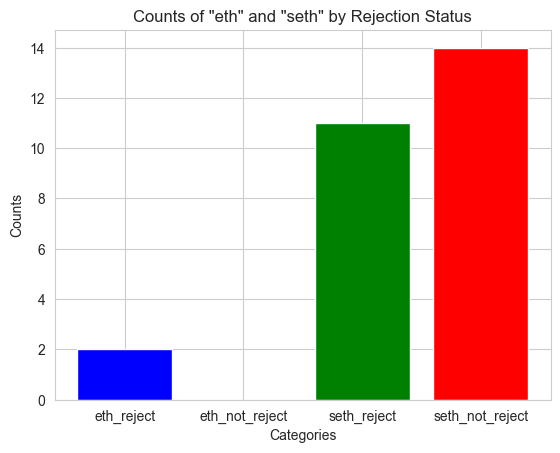

In [202]:
# Visualise results as a bar chart

categories = ['eth_reject', 'eth_not_reject', 'seth_reject', 'seth_not_reject']
counts = [eth_reject, eth_not_reject, seth_reject, seth_not_reject]

# Create bar chart
plt.bar(categories, counts, color=['blue', 'orange', 'green', 'red'])

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Counts of "eth" and "seth" by Rejection Status')

# Show plot
plt.show()

Quick glance shows us there's roughly equal counts of his name for each category. If we consider "eth" to mean seth there's 13 counts in RE and 14 for NRE. The fact that "eth" only appears in the reject category emphasises some impersonalisation in these emails

The boxplot in the earlier part of the analysis allowed us to compare token lengths within the status categories, I'd now like to extract the exact values from this box plot. 

C:\Users\ellyp\AppData\Local\Temp\ipykernel_20040\2244736967.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([reject, not_reject], vert=False, labels=['Reject Emails', 'Not Reject Emails'],


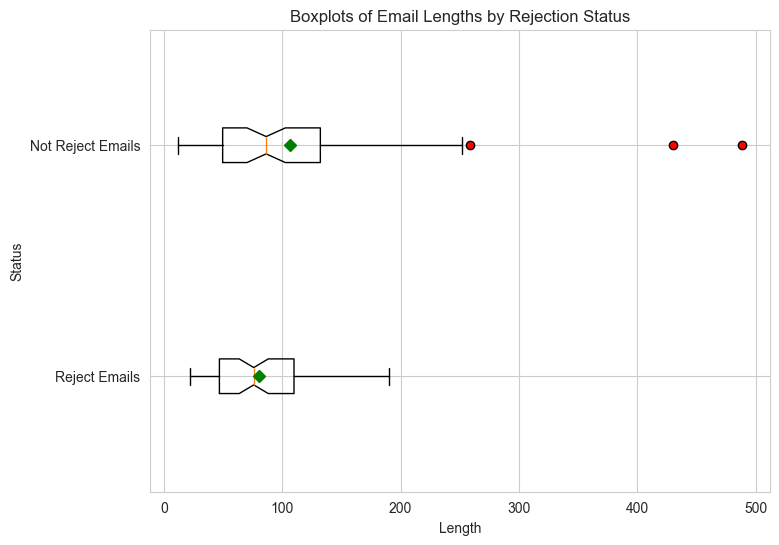

NRE stats:
[{'mean': 106.21875, 'iqr': 82.5, 'cilo': 70.309375, 'cihi': 102.690625, 'whishi': 252, 'whislo': 12, 'fliers': array([430, 488, 259], dtype=int64), 'q1': 49.75, 'med': 86.5, 'q3': 132.25}]
RE stats:
[{'mean': 80.3076923076923, 'iqr': 63.0, 'cilo': 63.73172440178139, 'cihi': 88.26827559821861, 'whishi': 190, 'whislo': 22, 'fliers': array([], dtype=int64), 'q1': 47.0, 'med': 76.0, 'q3': 110.0}]


In [203]:
# Visualise the box plot again for ease of reference

status_grouped = df.groupby('Status')['Length']

reject = status_grouped.get_group('reject')
not_reject = status_grouped.get_group('not_reject')

red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.figure(figsize=(8, 6))
plt.boxplot([reject, not_reject], vert=False, labels=['Reject Emails', 'Not Reject Emails'],
            flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

plt.xlabel('Length')
plt.ylabel('Status')
plt.title('Boxplots of Email Lengths by Rejection Status')
plt.show()

import matplotlib.cbook as cbook

reject_stats = cbook.boxplot_stats(reject)
not_reject_stats = cbook.boxplot_stats(not_reject)

print("NRE stats:")
print(not_reject_stats)

print("RE stats:")
print(reject_stats)

Breakdown:

- The mean token length in NRE is 106.11 compared to a length of 80.25 in RE.
- IQR = the width of the box. NRE is a larger box at 82.5 with RE at 62.
- cilo = lower bound of the confidence interval for the median, the starting point for the lowest notch. NRE set at 70.31, RE at 63.93.
- cihi = upper bound of the confidence interval/finishing point of the highest notch. NRE set at 102.70, RE at 88.07.
- whishi = the max token length value on the whiskers. 250 for NRE, 190 for RE. Notable that these are whole numbers.
- whislo = the min token length value on the whiskers. 12 for NRE, 22 for RE.
- fliers = Outliers: none for RE but the token lengths for the outliers in NRE are 430, 288 and 258.
- q1 = the lower quartile. 49.72 for NRE and 47 for RE, similiar results evidenced in the box plot.
- median = the median line. 86.5 for NRE and 76 for RE. only a difference of 10.
- q3 = the upper quartile. a difference of 132.25 for NRE and 109 for RE 109 for RE.

The exact figures confirm that both groups have similar token lengths at the lower bounds, as reflected in the Q1 results. The NRE group surpasses the RE group in instances with longer token counts, as initially observed in the boxplot and further validated by metrics such as IQR, cilo, cihi, whiskers, median, and Q3, all of which are higher in the non-rejection group compared to the rejection group.

The next investigation will be to observe the email from each group with a low token count and build a parser tree for each. 

In [204]:
# Using whislo results, display emails with a token length less than 23

small_tokens = df[df['Tokens'].str.len() < 23]

small_tokens.head()

,Email,Status,Tokens,Length,LexRich
28,"Unfortunately, PatientsLikeMe, LLC has decided...",reject,"[unfortunately, ,, patientslikeme, ,, llc, has...",22,0.954545
98,"Hi Seth, Your package has been delivered! How...",not_reject,"[hi, seth, ,, your, package, has, been, delive...",14,1.000000
101,"Hi Seth, Rate your experience with the seller,...",not_reject,"[hi, seth, ,, rate, your, experience, with, th...",12,0.916667
116,Thanks for applying for the position of Softwa...,not_reject,"[thanks, for, applying, for, the, position, of...",17,0.941176
119,"Hi Seth, Your financial statement for Jan 16,...",not_reject,"[hi, seth, ,, your, financial, statement, for,...",20,0.850000


In [205]:
import string

# store the tokens for respective emails in new variables 
re_tree = [token for token in small_tokens['Tokens'][28]]
nre_tree = [token for token in small_tokens['Tokens'][119]]

# preprocess to remove punctuation and empty strings 
pp_re_tree = [''.join(char for char in token if char not in string.punctuation) for token in re_tree]
pp_nre_tree = [''.join(char for char in token if char not in string.punctuation) for token in nre_tree]

pp_re_tree = [token for token in pp_re_tree if token]
pp_nre_tree = [token for token in pp_nre_tree if token]

print("Rejection email to parse", pp_re_tree)
print("Non-rejection email to parse", pp_nre_tree)
print("Token Lengths: RE", len(set(pp_re_tree)), "NRE", len(set(pp_nre_tree)))

Rejection email to parse ['unfortunately', 'patientslikeme', 'llc', 'has', 'decided', 'not', 'to', 'move', 'forward', 'with', 'your', 'full', 'stack', 'software', 'engineer', 'application', 'at', 'this', 'time']
Non-rejection email to parse ['hi', 'seth', 'your', 'financial', 'statement', 'for', 'jan', '16', '2021', 'through', 'feb', '15', '2021', 'has', 'been', 'generated']
Token Lengths: RE 19 NRE 15


In [206]:
# Apply stemming, observe token changes and unique token count

porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

# re
re_porter_stem = [porter.stem(t) for t in pp_re_tree]
re_lancaster_stem = [lancaster.stem(t) for t in pp_re_tree]
print("RE Porter Stemmer:", re_porter_stem)
print("RE Lancaster Stemmer:", re_lancaster_stem)
print("RE Token Lengths: Porter", len(set(re_porter_stem)), "Lancaster", len(set(re_lancaster_stem)))

# Line break
print("\n-------------------\n")

# nre 
nre_porter_stem = [porter.stem(t) for t in pp_nre_tree]
nre_lancaster_stem = [lancaster.stem(t) for t in pp_nre_tree]
print("NRE Porter Stemmer:", nre_porter_stem)
print("NRE Lancaster Stemmer:", nre_lancaster_stem)
print("NRE Token Lengths: Porter", len(set(nre_porter_stem)), "Lancaster", len(set(nre_lancaster_stem)))


RE Porter Stemmer: ['unfortun', 'patientslikem', 'llc', 'ha', 'decid', 'not', 'to', 'move', 'forward', 'with', 'your', 'full', 'stack', 'softwar', 'engin', 'applic', 'at', 'thi', 'time']
RE Lancaster Stemmer: ['unfortun', 'patientslikem', 'llc', 'has', 'decid', 'not', 'to', 'mov', 'forward', 'with', 'yo', 'ful', 'stack', 'softw', 'engin', 'apply', 'at', 'thi', 'tim']
RE Token Lengths: Porter 19 Lancaster 19

-------------------

NRE Porter Stemmer: ['hi', 'seth', 'your', 'financi', 'statement', 'for', 'jan', '16', '2021', 'through', 'feb', '15', '2021', 'ha', 'been', 'gener']
NRE Lancaster Stemmer: ['hi', 'seth', 'yo', 'fin', 'stat', 'for', 'jan', '16', '2021', 'through', 'feb', '15', '2021', 'has', 'been', 'gen']
NRE Token Lengths: Porter 15 Lancaster 15


The output shows there is some reduction to the base token with Lancaster being more aggressive as expected i.e. your vs yo, software vs softw. There is no change to the unique token count. Due to the small size token size for each sample email it is reductive to apply stemming in this circumstance. 

In [207]:
# Apply lemmatization, observe token changes and unique token count

wnl = nltk.WordNetLemmatizer()

# re
re_lem = [wnl.lemmatize(t) for t in pp_re_tree]
print("RE Lemmatization:", re_lem)
print(len(set(re_lem)))

# Line break
print("\n-------------------\n")

# nre 
nre_lem = [wnl.lemmatize(t) for t in pp_nre_tree]
print("NRE Lemmatization:", nre_lem)
print(len(set(nre_lem)))

RE Lemmatization: ['unfortunately', 'patientslikeme', 'llc', 'ha', 'decided', 'not', 'to', 'move', 'forward', 'with', 'your', 'full', 'stack', 'software', 'engineer', 'application', 'at', 'this', 'time']
19

-------------------

NRE Lemmatization: ['hi', 'seth', 'your', 'financial', 'statement', 'for', 'jan', '16', '2021', 'through', 'feb', '15', '2021', 'ha', 'been', 'generated']
15


The only change is the token "has" in the NRE email being reduced to a root form "ha" to represent "have". This suggests that the tokens in both sample emails already exist in their root form. There was also no change to the unique token count. Lemmatization proves to be just as reductive as stemming, offering limited value for the selected email samples.

I will now apply stop words and POS tagging. I have concerns that removing the stop words may result in some intelligible results so will construct POS tagging with and without stop words for comparison

In [208]:
from nltk import pos_tag

# remove stopwords
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stop_re_tree  = [w for w in pp_re_tree if w not in stopwords]
stop_nre_tree = [w for w in pp_nre_tree if w not in stopwords]

# POS tagging with stop words
stop_pos_re_tree = pos_tag(stop_re_tree)
stop_pos_nre_tree = pos_tag(stop_nre_tree)

# POS tagging without stop words
pos_re_tree = pos_tag(pp_re_tree)
pos_nre_tree = pos_tag(pp_nre_tree)

print("POS tagging without stop words")
print(stop_pos_re_tree)
print(stop_pos_nre_tree)
print('\n')
print("POS tagging with stop words")
print(pos_re_tree)
print(pos_nre_tree)

POS tagging without stop words
[('unfortunately', 'RB'), ('patientslikeme', 'JJ'), ('llc', 'NN'), ('decided', 'VBD'), ('move', 'NN'), ('forward', 'RB'), ('full', 'JJ'), ('stack', 'NN'), ('software', 'NN'), ('engineer', 'VB'), ('application', 'NN'), ('time', 'NN')]
[('hi', 'NN'), ('seth', 'VBZ'), ('financial', 'JJ'), ('statement', 'NN'), ('jan', 'NN'), ('16', 'CD'), ('2021', 'CD'), ('feb', 'NN'), ('15', 'CD'), ('2021', 'CD'), ('generated', 'VBD')]


POS tagging with stop words
[('unfortunately', 'RB'), ('patientslikeme', 'JJ'), ('llc', 'NN'), ('has', 'VBZ'), ('decided', 'VBN'), ('not', 'RB'), ('to', 'TO'), ('move', 'VB'), ('forward', 'RB'), ('with', 'IN'), ('your', 'PRP$'), ('full', 'JJ'), ('stack', 'NN'), ('software', 'NN'), ('engineer', 'NN'), ('application', 'NN'), ('at', 'IN'), ('this', 'DT'), ('time', 'NN')]
[('hi', 'NN'), ('seth', 'VB'), ('your', 'PRP$'), ('financial', 'JJ'), ('statement', 'NN'), ('for', 'IN'), ('jan', 'NN'), ('16', 'CD'), ('2021', 'CD'), ('through', 'IN'), ('feb'

Key points from RE:

- patientslikeme incorrectly identified as an adjective rather than a noun
- full stack split between adjective and noun, which is gramatically true but "full stack software developer" should be considered together with "application" which we'll consider when building the noun phrase
- The general structure is descriptive noun / repeating verb words / conjunction / repeating noun words / conjunction / noun

Key points from NRE:

- Straight away we can see an issue with Seth's name being identified as a verb in both contexts
- We have the introduction of cardinal digits (numbers, CD) which may need their own categorisation
- The general structure is noun / possessive descriptive noun / conjuction / named number / conjuction / named number / repeating verbs 

Now we need to construct a parser that can correctly identify the gramatical structure of our emails. The parser is built as follows:

- A noun phrase is an optional determiner, zero or more repeating adjectives, zero or more repeating nouns and zero or more numbers
- A prepopsition is a preposition
- A verb is any verb (past tense, 3rd person, base form etc)
- A prepositional phrase is a preposition and a noun phrase
- A verb phrase is zero or more repeating verbs of any type and an optional zero or more repeating adverbs of any type  

In [209]:
from nltk import pos_tag, word_tokenize, RegexpParser
from nltk.tree.tree import Tree

# define chunker 
chunker = RegexpParser("""
                    NP: {<DT>?<JJ>*<NN>*<CD>*}    # To extract Noun Phrases
                    P: {<IN>}                     # To extract Prepositions
                    V: {<V.*>}                    # To extract Verbs
                    PP: {<P> <NP>}                # To extract Prepositional Phrases
                    VP: {<V>*<RB*>?<NP|PP>*}              # To extract Verb Phrases
                    """)

# print RE POS only
output = chunker.parse(pos_re_tree)
print("RE POS Only\n", output)

# Line break
print("\n-------------------\n")

# print RE POS & stopwords removed
output = chunker.parse(stop_pos_re_tree)
print("RE POS without Stopwords\n", output)

# Line break
print("\n-------------------\n")

# print NRE POS only
output = chunker.parse(pos_nre_tree)
print("NRE POS Only\n", output)

# Line break
print("\n-------------------\n")

# print NRE POS & stopwords removed
output = chunker.parse(stop_pos_nre_tree)
print("NRE POS without Stopwords\n", output)

# Code to visualise the tree, uncomment to use
# output_re.draw()

RE POS Only
 (S
  (VP unfortunately/RB (NP patientslikeme/JJ llc/NN))
  (VP (V has/VBZ) (V decided/VBN) not/RB)
  to/TO
  (VP (V move/VB) forward/RB)
  (P with/IN)
  your/PRP$
  (VP
    (NP full/JJ stack/NN software/NN engineer/NN application/NN)
    (PP (P at/IN) (NP this/DT time/NN))))

-------------------

RE POS without Stopwords
 (S
  (VP unfortunately/RB (NP patientslikeme/JJ llc/NN))
  (VP (V decided/VBD) (NP move/NN))
  (VP forward/RB (NP full/JJ stack/NN software/NN))
  (VP (V engineer/VB) (NP application/NN time/NN)))

-------------------

NRE POS Only
 (S
  (VP (NP hi/NN))
  (VP (V seth/VB))
  your/PRP$
  (VP
    (NP financial/JJ statement/NN)
    (PP (P for/IN) (NP jan/NN 16/CD 2021/CD))
    (PP (P through/IN) (NP feb/NN 15/CD 2021/CD)))
  (VP (V has/VBZ) (V been/VBN) (V generated/VBN)))

-------------------

NRE POS without Stopwords
 (S
  (VP (NP hi/NN))
  (VP
    (V seth/VBZ)
    (NP financial/JJ statement/NN jan/NN 16/CD 2021/CD)
    (NP feb/NN 15/CD 2021/CD))
  (VP (V 

Observations

The parser was constructed observing the full sentence without stop word removal which chunks the email in a logical manner. This has affected how tokens are treated when stopwords arent applied. For example engineer is considered a verb rather than a noun when stop words are removed, possibly by the removal of "with your" indicaiting that it's a possessive word rather than a doing word "engineering". The removal of the stopwords in this email loses the meaning of the email, without the word "unfortunatley" it could be read as an acceptance email. 

Apart from the incorrect classification of Seth as a verb, the gramatical structure for both NRE with and without stop words seems clear and furthermore the email with the removal of stop words still makes sense.

Finally I will conduct sentiment analysis on the overall dataset using Vader and RoBERTa

In [210]:
# pre process the dataset 
df1 = pd.read_csv('Rejection Data - Sheet1.csv')

# convert email text to lowercase
df1.Email = df1.Email.apply(lambda x: x.lower())

# remove punctuation
df1.Email = df1.Email.apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))

# remove numbers
df1.Email = df1.Email.apply(lambda x: x.translate(str.maketrans('','','1234567890')))

# remove newline tags
df1.Email = df1.Email.apply(lambda x: x.translate(str.maketrans('\n',' ')))

# add tokens column
df1['Tokens'] = [nltk.word_tokenize(e) for e in df1.Email]

# add length column
df1['Length'] = df1['Tokens'].apply(len)

# add lexical richness column
df1['LexRich'] = df1['Tokens'].apply(lambda x: len(set(x)) / len(x))

# add column for vader
df1['Vader'] = ''

df1.tail()

,Email,Status,Tokens,Length,LexRich,Vader
124,starting march ebay will no longer offer se...,not_reject,"[starting, march, ebay, will, no, longer, offe...",119,0.563025,
125,hi seth i want to make finding a great remote...,not_reject,"[hi, seth, i, want, to, make, finding, a, grea...",77,0.753247,
126,hello seth i just wanted to take a second to ...,not_reject,"[hello, seth, i, just, wanted, to, take, a, se...",51,0.823529,
127,your free youmail plan includes inapp transcr...,not_reject,"[your, free, youmail, plan, includes, inapp, t...",30,0.800000,
128,support resources for developers at all level...,not_reject,"[support, resources, for, developers, at, all,...",127,0.716535,


First we add the VADER sentiment scores to the dataset

In [211]:
# detect the sentiment using Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# compute sentiment tags for vader column
for i, token in df1.iterrows():
    ss = sid.polarity_scores(token['Email'])
    if ss['compound'] >= 0.05:
        v_lab = 'pos'
    elif ss['compound'] <= -0.05:
        v_lab = 'neg'
    else:
        v_lab = 'neutral'
    df1.at[i, 'Vader'] = v_lab

df1.head()

,Email,Status,Tokens,Length,LexRich,Vader
0,thank you for applying to the junior software ...,reject,"[thank, you, for, applying, to, the, junior, s...",35,0.857143,neutral
1,thank you for your interest in the train to hi...,reject,"[thank, you, for, your, interest, in, the, tra...",40,0.825000,pos
2,eth thank you for your interest in exyn and ...,reject,"[eth, thank, you, for, your, interest, in, exy...",125,0.680000,pos
3,thank you for your interest in the software en...,reject,"[thank, you, for, your, interest, in, the, sof...",43,0.720930,pos
4,hi seth thank you for your interest in pathai...,reject,"[hi, seth, thank, you, for, your, interest, in...",70,0.728571,pos


Next we add the RoBERTa model

In [212]:
# detect the sentiment using Roberta

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

def roberta_polarity_scores(example):
    #adding truncation parameter due to text being longer than this model can handle
    encoded_text = tokenizer(example, return_tensors='pt', truncation=True, max_length=512) 
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

# compute sentiment tags for Roberta column
for i, token in df1.iterrows():
    rs = roberta_polarity_scores(token['Email'])
    
    # Determine the sentiment label
    if rs['roberta_pos'] > rs['roberta_neg'] and rs['roberta_pos'] > rs['roberta_neu']:
        r_lab = 'pos'
    elif rs['roberta_neg'] > rs['roberta_pos'] and rs['roberta_neg'] > rs['roberta_neu']:
        r_lab = 'neg'
    else:
        r_lab = 'neutral'
    
    df1.at[i, 'Roberta'] = r_lab

C:\Users\ellyp\AI\Practice Projects\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [213]:
df1.head()

,Email,Status,Tokens,Length,LexRich,Vader,Roberta
0,thank you for applying to the junior software ...,reject,"[thank, you, for, applying, to, the, junior, s...",35,0.857143,neutral,neutral
1,thank you for your interest in the train to hi...,reject,"[thank, you, for, your, interest, in, the, tra...",40,0.825000,pos,pos
2,eth thank you for your interest in exyn and ...,reject,"[eth, thank, you, for, your, interest, in, exy...",125,0.680000,pos,pos
3,thank you for your interest in the software en...,reject,"[thank, you, for, your, interest, in, the, sof...",43,0.720930,pos,pos
4,hi seth thank you for your interest in pathai...,reject,"[hi, seth, thank, you, for, your, interest, in...",70,0.728571,pos,pos


In [214]:
# NRE sentiment counts
NRE = df1[df1['Status'] == 'not_reject']
vader_NRE_sentiment = NRE['Vader'].value_counts()
roberta_NRE_sentiment = NRE['Roberta'].value_counts()

# RE sentiment counts
RE = df1[df1['Status'] == 'reject']
vader_RE_sentiment = RE['Vader'].value_counts()
roberta_RE_sentiment = RE['Roberta'].value_counts()


print("\nSentiment Counts for NRE:")
print(vader_NRE_sentiment)
print(roberta_NRE_sentiment)

print("\nSentiment Counts for RE:")
print(vader_RE_sentiment)
print(roberta_RE_sentiment)



Sentiment Counts for NRE:
Vader
pos        58
neutral     4
neg         2
Name: count, dtype: int64
Roberta
pos        37
neutral    25
neg         2
Name: count, dtype: int64

Sentiment Counts for RE:
Vader
pos        54
neutral     8
neg         3
Name: count, dtype: int64
Roberta
pos        52
neg         8
neutral     5
Name: count, dtype: int64


Lets visualise the data

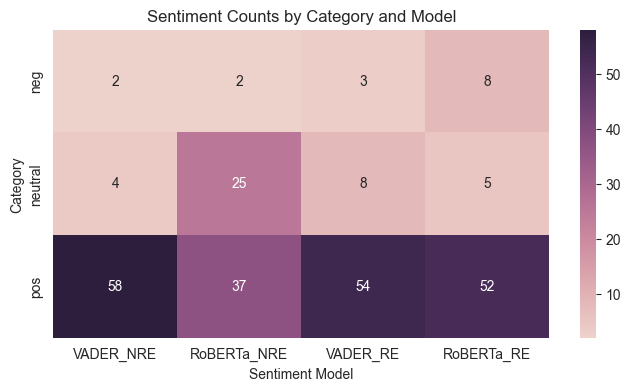

In [215]:
import seaborn as sns

# create df from the sentiment counts
sentiment_counts = pd.DataFrame({
    'VADER_NRE': vader_NRE_sentiment,
    'RoBERTa_NRE': roberta_NRE_sentiment,
    'VADER_RE': vader_RE_sentiment,
    'RoBERTa_RE': roberta_RE_sentiment
})

# plot as a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(sentiment_counts, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Sentiment Counts by Category and Model')
plt.xlabel('Sentiment Model')
plt.ylabel('Category')
plt.show()

The heatmap shows that the rejection emails semtiment is considered positive by both models, which would be expected due to the professional nature that emails need to have. RoBERTa was able to pick up on more negative undertones as opposed to Vader in the rejection emails. RoBERTa has a significantly reduced postive sentiment allocation for the non-rejection emails compared to Vader and appears to detect more neutral sentiments instead, with the same negative sentiment scores for both models in the non-rejection emails. We'll now observe some of the emails in the sentiment categories of each model.

In [216]:
# view the emails categorised as neutral - NRE Vader
vader_neutral_emails_nre = df1[(df1['Status'] == 'not_reject') & (df1['Vader'] == 'neutral')]['Email']
for idx, email in vader_neutral_emails_nre.items():
    print(f"Email {idx}:\n{email}\n")

Email 65:
seth polyniak  as part of your application to entry level back end developer  we recently invited you to complete our coding assessment  we wanted to let you know that your responses have been received and are being considered along with other information from your application process to determine next steps these next steps may include being invited to complete another assessment or invitation to an interview  please note that if you did not just complete an assessment this means that your responses were returned from a prior application to ibm and completion of the same assessment as your assessment responses remain valid for  months there is no need to retake this assessment at this time  ibm assessment team

Email 98:
hi seth your package has been delivered  how was your delivery

Email 101:
hi seth rate your experience with the seller makerhawkus

Email 119:
hi seth  your financial statement for jan   through feb   has been generated 



In [217]:
# view the emails categorised as neutral - NRE RoBERTa
roberta_neutral_emails_nre = df1[(df1['Status'] == 'not_reject') & (df1['Roberta'] == 'neutral')]['Email']
for idx, email in roberta_neutral_emails_nre.items():
    print(f"Email {idx}:\n{email}\n")

Email 65:
seth polyniak  as part of your application to entry level back end developer  we recently invited you to complete our coding assessment  we wanted to let you know that your responses have been received and are being considered along with other information from your application process to determine next steps these next steps may include being invited to complete another assessment or invitation to an interview  please note that if you did not just complete an assessment this means that your responses were returned from a prior application to ibm and completion of the same assessment as your assessment responses remain valid for  months there is no need to retake this assessment at this time  ibm assessment team

Email 70:
ello seth  just one more step before you get started  you must confirm your identity using the onetime pass code note  this code will expire in  minutes  sincerely  ust us recruiting team

Email 82:
an account has been created for you on our company career s

RoBERTa identified the same neutral sentiments as Vader with an additional 21 emails more emails, observing the contents of these emails it can be said they are neutral in tone. This indicates that RoBERTa is more effective at accurately identifying neutral sentiment.

In [218]:
# view the emails categorised as neutral - RE Vader
vader_neutral_emails_re = df1[(df1['Status'] == 'reject') & (df1['Vader'] == 'neutral')]['Email']
for idx, email in vader_neutral_emails_re.items():
    print(f"Email {idx}:\n{email}\n")

Email 0:
thank you for applying to the junior software developer position at msc technology unfortunately msc technology has moved to the next step in their hiring process and your application was not selected at this time

Email 10:
thank you for applying to the java developer position at sports information analysis unfortunately sports information analysis has moved to the next step in their hiring process and your application was not selected at this time

Email 12:
thank you for applying to the entrylevel web programmer position at oahu publications inc unfortunately oahu publications inc has moved to the next step in their hiring process and your application was not selected at this time

Email 17:
thank you for applying to the entry level developer position at the nexxus group unfortunately the nexxus group has moved to the next step in their hiring process and your application was not selected at this time

Email 20:
thank you for applying to the full stack developer position at

In [219]:
# view the emails categorised as neutral - RE RoBERTa
roberta_neutral_emails_re = df1[(df1['Status'] == 'reject') & (df1['Roberta'] == 'neutral')]['Email']
for idx, email in roberta_neutral_emails_re.items():
    print(f"Email {idx}:\n{email}\n")

Email 0:
thank you for applying to the junior software developer position at msc technology unfortunately msc technology has moved to the next step in their hiring process and your application was not selected at this time

Email 10:
thank you for applying to the java developer position at sports information analysis unfortunately sports information analysis has moved to the next step in their hiring process and your application was not selected at this time

Email 20:
thank you for applying to the full stack developer position at test innovators unfortunately test innovators has moved to the next step in their hiring process and your application was not selected at this time

Email 22:
thank you for applying to the javascript  ruby on rails developer  remote  work from home position at tithely unfortunately tithely has moved to the next step in their hiring process and your application was not selected at this time

Email 31:
thanks for your interest in the web designerdeveloper inter

These should all technically be considered negative as they are rejections, however as discussed previously, the polite and positive language such as "thank you" "next step" and "best of luck" may mitigate the impact of negative tokens like "unfortunately" and "not." Vader's higher count compared to RoBERTa suggets it is better at identifying the negative tokens despite the presence of positive langauge, whereas RoBERTa may have classified these emails as positive.

In [220]:
# view the emails categorised as negative  - NRE Vader
vader_neg_emails_nre = df1[(df1['Status'] == 'not_reject') & (df1['Vader'] == 'neg')]['Email']
for idx, email in vader_neg_emails_nre.items():
    print(f"Email {idx}:\n{email}\n")

Email 108:
we are writing to let you know that an error in our domain verification check process for firebase hosting caused a number of emails with a subject line of firebase reverify ownership of your hosting domain to be sent incorrectly you’re receiving this email because you were sent one or more ownership reverification notices between february  to february  

Email 114:
you only have until pm est tuesday february   to sell either the shining fates elite trainer box x or x lot to unlock an automatic  off the seller fees so stop waiting and get more money back in that payout remember your ask must be accepted within the above timeframe to receive the discount



In [221]:
# view the emails categorised as negative - NRE RoBERTa
roberta_neg_emails_nre = df1[(df1['Status'] == 'not_reject') & (df1['Roberta'] == 'neg')]['Email']
for idx, email in roberta_neg_emails_nre.items():
    print(f"Email {idx}:\n{email}\n")

Email 108:
we are writing to let you know that an error in our domain verification check process for firebase hosting caused a number of emails with a subject line of firebase reverify ownership of your hosting domain to be sent incorrectly you’re receiving this email because you were sent one or more ownership reverification notices between february  to february  

Email 118:
 for any issues including the recipient not receiving funds please contact us at supportvenmocom or call  see our disclosures for more information please do not reply directly to this email for more assistance visit our help center at helpvenmocom this payment will be reviewed for compliance with our user agreement and if we determine that there is a violation by either party it may be reversed or your ability to transfer to your bank account may be restricted 



Both models classed email 108 as negative which appears correct as it's advising on an error. There's an interesting difference between Vader selecting 114 and RoBERTa selecting 118 as their second negative email choices; 114 is a sales email using language to build pressure on selling an item quickly, whereas 118 is informative however words such as "violation" "issues" and "restricted" allude to a negative sentiment. Each model appears to have a nuanced take on how they contextualise negative tone in each email.

In [222]:
# view the emails categorised as negative  - RE Vader
vader_neg_emails_nre = df1[(df1['Status'] == 'reject') & (df1['Vader'] == 'neg')]['Email']
for idx, email in vader_neg_emails_nre.items():
    print(f"Email {idx}:\n{email}\n")

Email 27:
unfortunately softsages technology inc has decided not to move forward with your software developer  entry level application at this time 

Email 28:
unfortunately patientslikeme llc has decided not to move forward with your full stack software engineer application at this time 

Email 44:
unfortunately vensit has decided not to move forward with your junior python developeronly w roles application at this time 



In [223]:
# view the emails categorised as negative - RE RoBERTa
roberta_neg_emails_re = df1[(df1['Status'] == 'reject') & (df1['Roberta'] == 'neg')]['Email']
for idx, email in roberta_neg_emails_re.items():
    print(f"Email {idx}:\n{email}\n")

Email 12:
thank you for applying to the entrylevel web programmer position at oahu publications inc unfortunately oahu publications inc has moved to the next step in their hiring process and your application was not selected at this time

Email 17:
thank you for applying to the entry level developer position at the nexxus group unfortunately the nexxus group has moved to the next step in their hiring process and your application was not selected at this time

Email 21:
thank you for applying to the backend developer position at yinzcam inc unfortunately yinzcam inc has moved to the next step in their hiring process and your application was not selected at this time

Email 26:
hi seth  thanks for your interest in fritz ai unfortunately we are unable to offer you a position at this time well keep your resume on file and reach out if that changes in the future  best jameson

Email 27:
unfortunately softsages technology inc has decided not to move forward with your software developer  entr

The token "unfortunatley" appears to be the keyword in both models in detecting negative sentiment in the rejection emails, if there was more time available further analysis of this keyword in the dataset would be beneficial. RoBERTa identified more rejection emails compared to Vader, which only detected "unfortunately" as a negative indicator when it appeared at the beginning of a sentence.